### Bangalore Pollution data EDA

Central Pollution Control Board
Continuous Ambient Air Quality

Date : Thursday 15th December,2022    Time : 4:14:53 PM

Location : Silk Road, Bengaluru,KSPCB

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [84]:
# importing the dataset
df_1=pd.read_excel('pollution_data.xlsx',skiprows=16,nrows=1080)
df_1.head()

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO
0,01-01-2020 00:00,02-01-2020 00:00,None,None,None,None,None
1,02-01-2020 00:00,03-01-2020 00:00,43.67,134,3.41,16.21,0.91
2,03-01-2020 00:00,04-01-2020 00:00,30.58,74.42,3.27,10.04,0.96
3,04-01-2020 00:00,05-01-2020 00:00,66.35,155.68,3.25,94.71,2.54
4,05-01-2020 00:00,06-01-2020 00:00,48,99.13,2.95,11.4,1.14


In [85]:
df_1.shape

(1080, 7)

In [86]:
df_1.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'SO2', 'NOx', 'CO'], dtype='object')

In [87]:
df_1['From Date'].unique()   # checking whether header of the data present from 1097 row came into this dataframe or not
                            ## everything seems to be clear

array(['01-01-2020 00:00', '02-01-2020 00:00', '03-01-2020 00:00', ...,
       '13-12-2022 00:00', '14-12-2022 00:00', '15-12-2022 00:00'],
      dtype=object)

### Importing the second dataset

In [88]:
df_2 = pd.read_excel('pollution_data.xlsx',skiprows=1101)
df_2.head()

,From Date,To Date,Ozone,NH3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,01-01-2020 00:00,02-01-2020 00:00,None,None,NaN,NaN,NaN
1,02-01-2020 00:00,03-01-2020 00:00,21.82,10.98,NaN,NaN,NaN
2,03-01-2020 00:00,04-01-2020 00:00,23.31,12.1,NaN,NaN,NaN
3,04-01-2020 00:00,05-01-2020 00:00,29.7,11.75,NaN,NaN,NaN
4,05-01-2020 00:00,06-01-2020 00:00,31.01,9.79,NaN,NaN,NaN


In [89]:
df_2.columns

Index(['From Date', 'To Date', 'Ozone', 'NH3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [90]:
df_2.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
df_2.head()

,From Date,To Date,Ozone,NH3
0,01-01-2020 00:00,02-01-2020 00:00,None,None
1,02-01-2020 00:00,03-01-2020 00:00,21.82,10.98
2,03-01-2020 00:00,04-01-2020 00:00,23.31,12.1
3,04-01-2020 00:00,05-01-2020 00:00,29.7,11.75
4,05-01-2020 00:00,06-01-2020 00:00,31.01,9.79


Notice that the dates of the df_1 and df_2 are exactly same...hence I can drop the dates column from df_2

In [91]:
df_2.drop(['From Date','To Date'],axis=1,inplace=True)
df_2.head()

,Ozone,NH3
0,None,None
1,21.82,10.98
2,23.31,12.1
3,29.7,11.75
4,31.01,9.79


# Concatination of df_1 & df_2 to form the main dataset...!!!

In [128]:
df = pd.concat([df_1,df_2],axis=1,join='inner')
display(df)

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3
0,01-01-2020 00:00,02-01-2020 00:00,None,None,None,None,None,None,None
1,02-01-2020 00:00,03-01-2020 00:00,43.67,134,3.41,16.21,0.91,21.82,10.98
2,03-01-2020 00:00,04-01-2020 00:00,30.58,74.42,3.27,10.04,0.96,23.31,12.1
3,04-01-2020 00:00,05-01-2020 00:00,66.35,155.68,3.25,94.71,2.54,29.7,11.75
4,05-01-2020 00:00,06-01-2020 00:00,48,99.13,2.95,11.4,1.14,31.01,9.79
...,...,...,...,...,...,...,...,...,...
1075,11-12-2022 00:00,12-12-2022 00:00,23,55,5.28,None,0.59,19.51,45.5
1076,12-12-2022 00:00,13-12-2022 00:00,None,None,None,None,None,None,None
1077,13-12-2022 00:00,14-12-2022 00:00,10.43,24.9,5.59,0.59,0.49,26.13,46.19
1078,14-12-2022 00:00,15-12-2022 00:00,16.74,40.2,5.5,8.13,0.67,24.49,55.64


In [109]:
df.shape

(1080, 9)

In [111]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'SO2', 'NOx', 'CO', 'Ozone',
       'NH3'],
      dtype='object')

In [112]:
df.describe()

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3
count,1080,1080,1080,1080,1080,1080,1080,1080,1080
unique,1080,1080,918,966,383,835,138,812,800
top,01-01-2020 00:00,02-01-2020 00:00,None,None,None,None,None,None,None
freq,1,1,65,65,144,68,66,65,66


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  1080 non-null   object
 1   To Date    1080 non-null   object
 2   PM2.5      1080 non-null   object
 3   PM10       1080 non-null   object
 4   SO2        1080 non-null   object
 5   NOx        1080 non-null   object
 6   CO         1080 non-null   object
 7   Ozone      1080 non-null   object
 8   NH3        1080 non-null   object
dtypes: object(9)
memory usage: 76.1+ KB


In [114]:
# Checking for the null values in the dataframe

df.isnull().sum()

From Date    0
To Date      0
PM2.5        0
PM10         0
SO2          0
NOx          0
CO           0
Ozone        0
NH3          0
dtype: int64

Since it is a pllution related study, hence 'None' value in the corresponding gas column means absence of that gas...
Hence,we can easily replace 'None' with 0...!!!

In [137]:
df.replace(to_replace='None',value=0.00,inplace=True)
df.head()

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3,Day
0,01-01-2020 00:00,02-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,02-01-2020 00:00,03-01-2020 00:00,43.67,134.00,3.41,16.21,0.91,21.82,10.98,2
2,03-01-2020 00:00,04-01-2020 00:00,30.58,74.42,3.27,10.04,0.96,23.31,12.10,3
3,04-01-2020 00:00,05-01-2020 00:00,66.35,155.68,3.25,94.71,2.54,29.70,11.75,4
4,05-01-2020 00:00,06-01-2020 00:00,48.00,99.13,2.95,11.40,1.14,31.01,9.79,5


### Now let us convert the Date columns into pandas datetime data format...

In [118]:
type(df['From Date'][1])    # it is in string...

str

In [138]:
df['From Date'] = pd.to_datetime(df['From Date'],format='%d-%m-%Y %H:%M')
df.head()

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3,Day
0,2020-01-01,02-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,2020-01-02,03-01-2020 00:00,43.67,134.00,3.41,16.21,0.91,21.82,10.98,2
2,2020-01-03,04-01-2020 00:00,30.58,74.42,3.27,10.04,0.96,23.31,12.10,3
3,2020-01-04,05-01-2020 00:00,66.35,155.68,3.25,94.71,2.54,29.70,11.75,4
4,2020-01-05,06-01-2020 00:00,48.00,99.13,2.95,11.40,1.14,31.01,9.79,5


In [120]:
type(df['From Date'][1]) 

pandas._libs.tslibs.timestamps.Timestamp

If we carefully observe the date columns, we can see that each from and to date row consist of data from a single day...
Hence for ease of analysis, we can form a separate column labelling the day and do our analysis...!!!

In [139]:
df['Day'] = df.index+1
df.head()

,From Date,To Date,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3,Day
0,2020-01-01,02-01-2020 00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,2020-01-02,03-01-2020 00:00,43.67,134.00,3.41,16.21,0.91,21.82,10.98,2
2,2020-01-03,04-01-2020 00:00,30.58,74.42,3.27,10.04,0.96,23.31,12.10,3
3,2020-01-04,05-01-2020 00:00,66.35,155.68,3.25,94.71,2.54,29.70,11.75,4
4,2020-01-05,06-01-2020 00:00,48.00,99.13,2.95,11.40,1.14,31.01,9.79,5


# Now, let's do some visualization...!!!

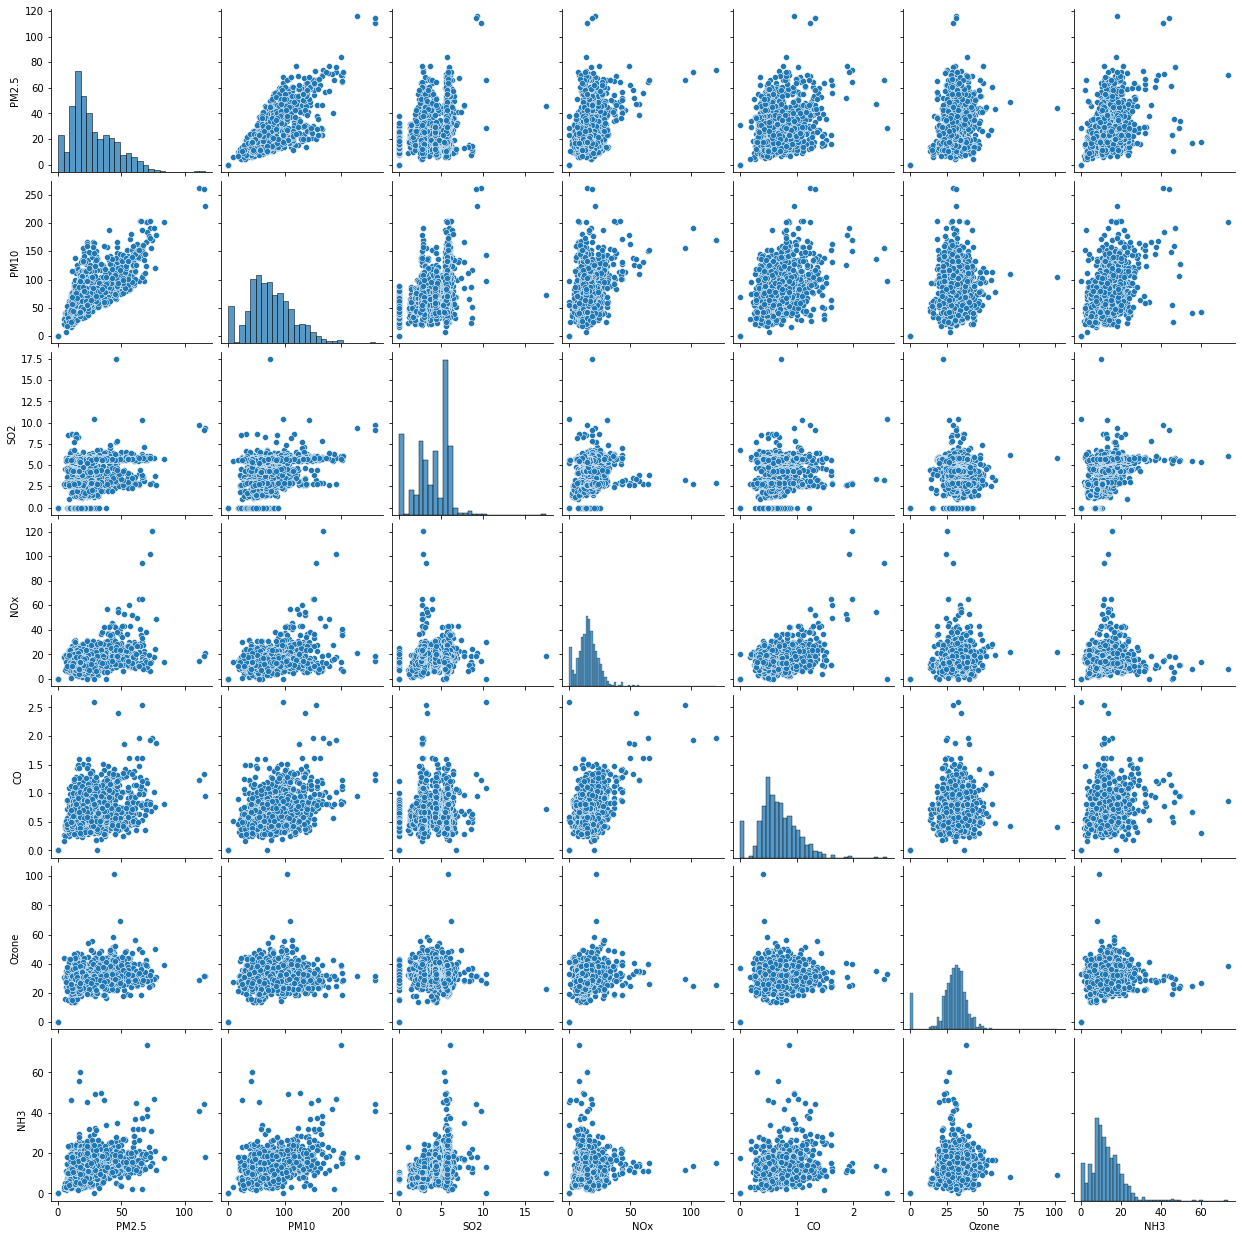

In [121]:
sns.pairplot(df)

In [122]:
df.corr()

,PM2.5,PM10,SO2,NOx,CO,Ozone,NH3
PM2.5,1.000000,0.802234,0.371483,0.472975,0.414395,0.405544,0.455042
PM10,0.802234,1.000000,0.526261,0.443858,0.523372,0.367372,0.524305
SO2,0.371483,0.526261,1.000000,0.254957,0.310749,0.234212,0.532723
NOx,0.472975,0.443858,0.254957,1.000000,0.491861,0.371163,0.142266
CO,0.414395,0.523372,0.310749,0.491861,1.000000,0.367945,0.337419
Ozone,0.405544,0.367372,0.234212,0.371163,0.367945,1.000000,0.270376
NH3,0.455042,0.524305,0.532723,0.142266,0.337419,0.270376,1.000000


<AxesSubplot:>

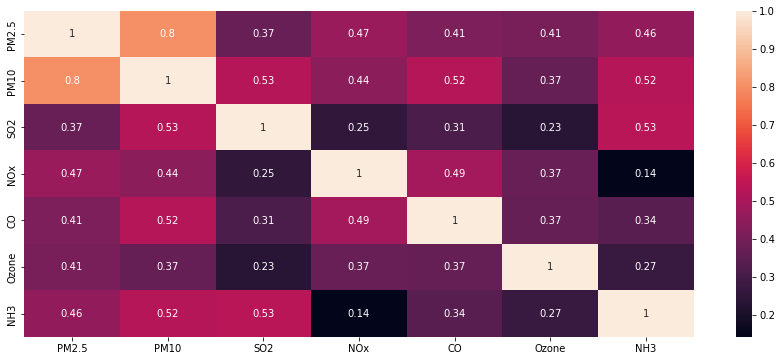

In [123]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


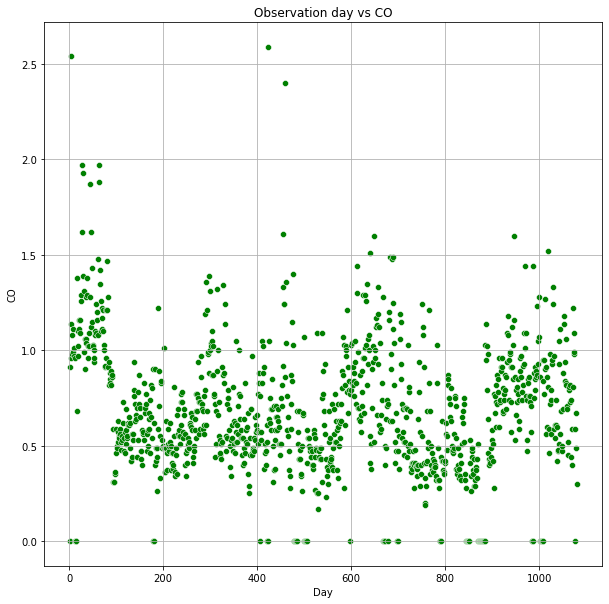

In [140]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.CO,color='green')
plt.title('Observation day vs CO')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


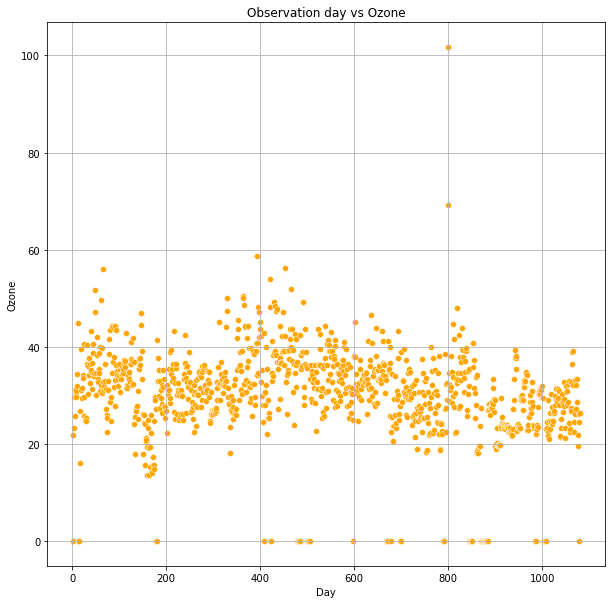

In [142]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.Ozone,color='orange')
plt.title('Observation day vs Ozone')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


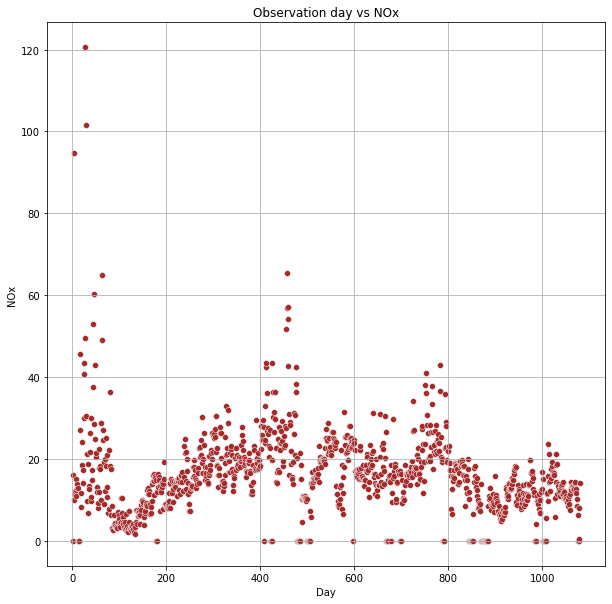

In [143]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.NOx,color='brown')
plt.title('Observation day vs NOx')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


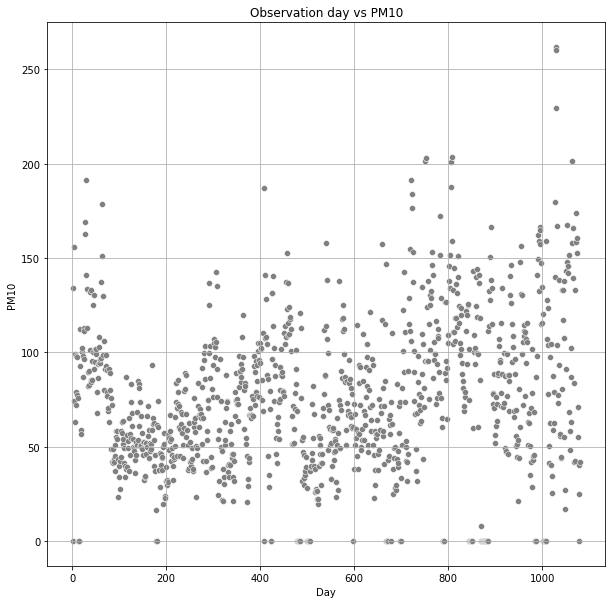

In [144]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.PM10,color='grey')
plt.title('Observation day vs PM10')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


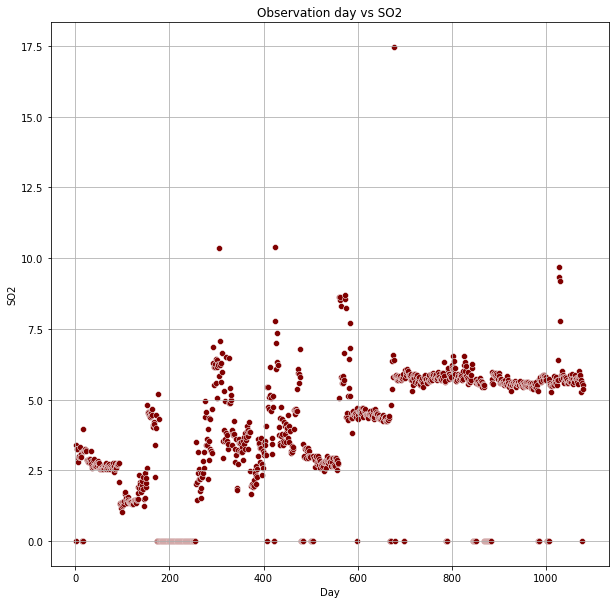

In [145]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.SO2,color='maroon')
plt.title('Observation day vs SO2')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


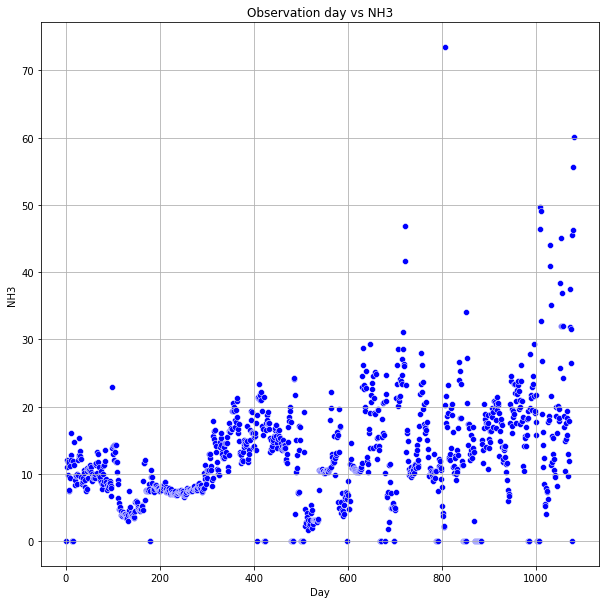

In [146]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df.NH3,color='blue')
plt.title('Observation day vs NH3')
plt.grid()
plt.show()

C:\Users\Argha009\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


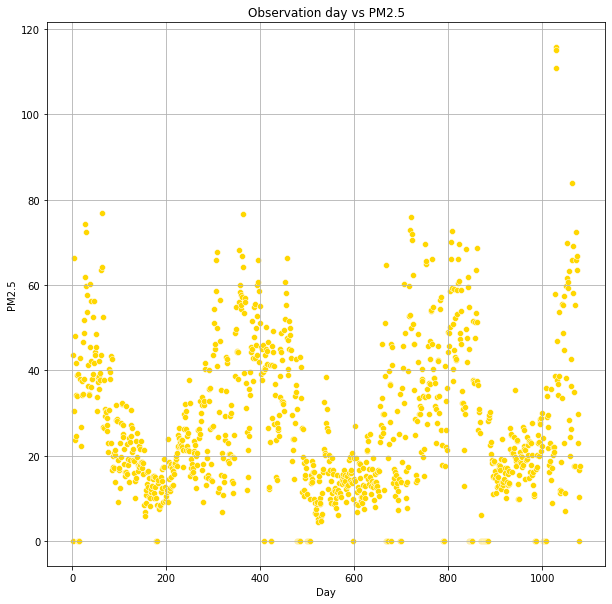

In [149]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.Day,df['PM2.5'],color='gold')
plt.title('Observation day vs PM2.5')
plt.grid()
plt.show()